In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [6]:
df = pd.read_csv("singindex_nanotech_data.csv", index_col=0)
metadf = pd.read_csv("singindex_nanotech_metadata.csv", encoding= 'unicode_escape')

In [7]:
df.describe()

,Nanotech market value (billions USD),Annual revenue for Oxford Nanopore Technologies Ltd. (£1000 GBP),Funding raised by Oxford Nanopore Technologies Ltd (Million GBP),Global market for nanoparticles in biotechnology and pharmaceuticals (billion USD),The global market for nanoparticles instrumentation in life sciences (billiion USD),Global market value of nano material (billion USD),US government investment in Nanotechnology (million USD),Global government investment in Nanotechnology (million USD),Global market size of nanomedicine (USD billions) (visual estimation on chart),Graphene-based products market value worldwide from 2015 to 2025 (million USD),...,Number of nanomaterals over time (visual estimation on chart),comulative total nano products listed on Consumer Products Inventory (CPI) over time,Number of available nano products in home and garden sector overt time (visual estimate on chart) (CPI),Number of available nano products in Health and Fitness sector overt time (visual estimate on chart) (CPI),Number of nano product available in USA (CPI) (visual estimate on chart),Number of nano product available in Europe (CPI) (visual estimate on chart),Number of nano product available in East Asia (CPI) (visual estimate on chart),Comulative number of nanoproducts on Nanodatabase over time,Number of products associate with major nanomaterial (silver) over time on CPI,Number of nano tech firms in material sector over time (visual estimate)
count,9.000000,3.000000,11.000000,3.000000,3.000000,5.000000,15.000000,15.000000,9.000000,3.000000,...,11.000000,11.000000,9.000000,9.000000,3.000000,3.000000,3.000000,10.000000,3.000000,8.000000
mean,35.700000,6354.000000,40.959091,44.800000,6.433333,5.524000,1358.893333,2210.680000,64.333333,803.966667,...,1032.727273,1050.090909,180.444444,556.888889,483.666667,283.333333,193.666667,2990.000000,239.333333,78.000000
std,21.784398,6709.313601,33.971553,30.398026,1.193035,4.519057,448.296534,557.517886,21.371710,1132.974670,...,565.067977,586.570448,90.683669,161.681357,323.867771,221.434716,133.192843,1505.083756,189.172761,29.189039
min,15.700000,746.000000,7.750000,25.000000,5.600000,1.100000,464.000000,1536.000000,38.000000,1.500000,...,50.000000,54.000000,64.000000,358.000000,120.000000,30.000000,40.000000,1208.000000,25.000000,41.000000
25%,20.700000,2637.500000,15.700000,27.300000,5.750000,2.100000,1094.500000,1713.600000,50.000000,155.950000,...,715.000000,691.500000,136.000000,490.000000,355.000000,205.000000,152.500000,1636.000000,167.500000,55.500000
50%,26.000000,4529.000000,31.400000,29.600000,5.900000,4.100000,1536.900000,2157.000000,60.000000,310.400000,...,1000.000000,1015.000000,136.000000,490.000000,590.000000,380.000000,265.000000,2934.000000,310.000000,77.000000
75%,48.900000,9158.000000,55.000000,54.700000,6.850000,8.520000,1628.000000,2657.000000,77.000000,1205.200000,...,1500.000000,1533.000000,240.000000,600.000000,665.500000,410.000000,270.500000,3999.000000,346.500000,99.250000
max,75.800000,13787.000000,100.000000,79.800000,7.800000,11.800000,1912.800000,3326.000000,100.000000,2100.000000,...,1780.000000,1833.000000,357.000000,908.000000,741.000000,440.000000,276.000000,5205.000000,383.000000,118.000000


## Pre-processing

### Build index components

In [8]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [9]:
df[index_comps].to_csv("singindex_nanotech_raw_components.csv")
df_index.to_csv("singindex_nanotech_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_nanotech_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [10]:
from scipy import interpolate

In [19]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=2)

<AxesSubplot:xlabel='years'>

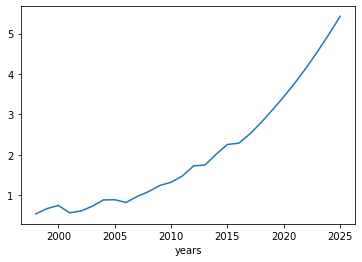

In [20]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [27]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(singindex_historic.index[-20:], singindex_historic.values[-20:], fill_value="extrapolate")

<AxesSubplot:>

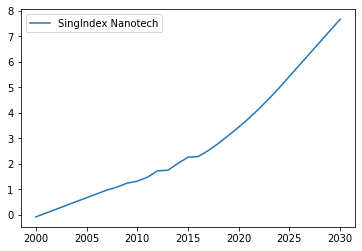

In [28]:
singindex = pd.DataFrame({"SingIndex Nanotech": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [29]:
singindex

,SingIndex Nanotech
2000,-0.079534
2001,0.070601
2002,0.220736
2003,0.370871
2004,0.521005
2005,0.671140
2006,0.821275
2007,0.971410
2008,1.089881
2009,1.242729


### Export

In [30]:
df_interp_index.to_csv("singindex_nanotech_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_nanotech_avg_interpolate.csv")
singindex.to_csv("singindex_nanotech_avg_extrapolate_2000_2030.csv")